Matplotlib is building the font cache; this may take a moment.


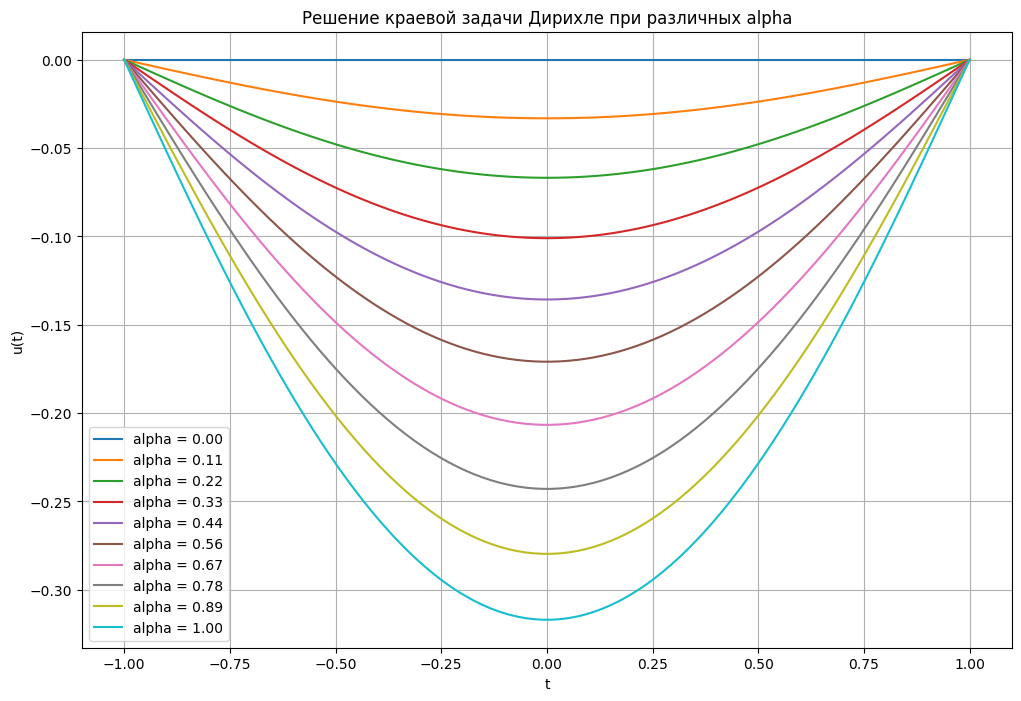

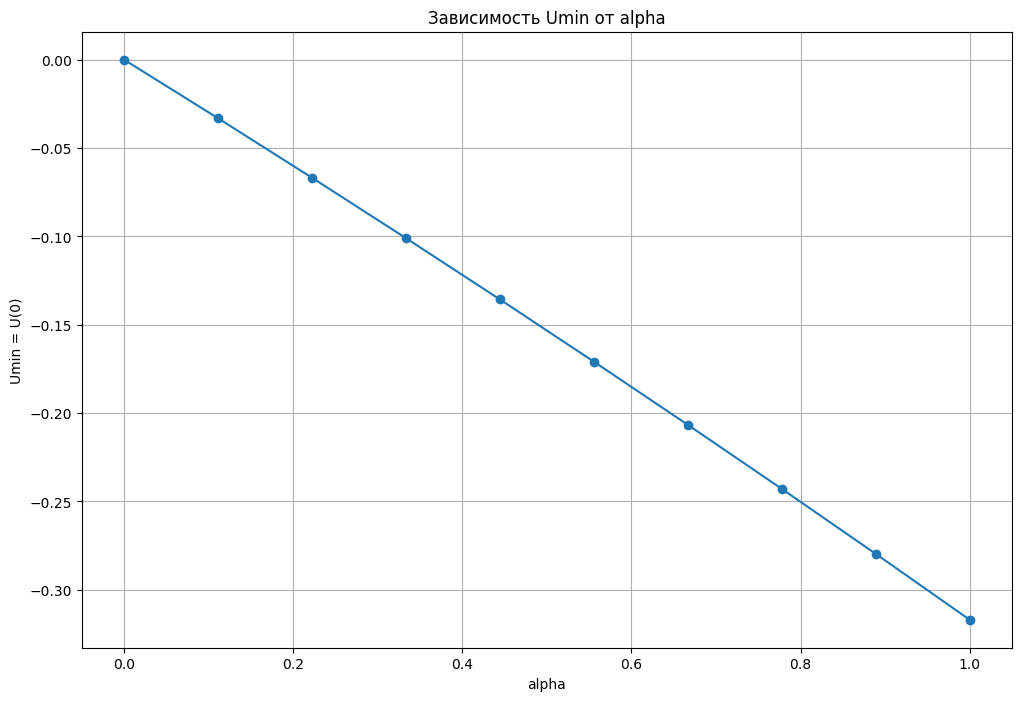

alpha = 0.00, Umin = U(0) = 0.0000
alpha = 0.11, Umin = U(0) = -0.0332
alpha = 0.22, Umin = U(0) = -0.0668
alpha = 0.33, Umin = U(0) = -0.1010
alpha = 0.44, Umin = U(0) = -0.1357
alpha = 0.56, Umin = U(0) = -0.1709
alpha = 0.67, Umin = U(0) = -0.2066
alpha = 0.78, Umin = U(0) = -0.2429
alpha = 0.89, Umin = U(0) = -0.2797
alpha = 1.00, Umin = U(0) = -0.3170


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Параметры сетки
N = 100  # Количество точек
t = np.linspace(-1, 1, N)
dt = t[1] - t[0]

# Функция для вычисления нелинейной системы уравнений
def nonlinear_system(u, alpha):
    N = len(u)
    F = np.zeros(N)
    
    # Граничные условия
    F[0] = u[0]
    F[-1] = u[-1]
    
    # Внутренние точки
    for i in range(1, N-1):
        F[i] = (u[i+1] - 2*u[i] + u[i-1]) / dt**2 + (alpha * t[i]**2 - 1) * np.exp(u[i]) + (1 - alpha)
    
    return F

# Процедура продолжения по параметру alpha
def continuation_method(alpha_values):
    u = np.zeros(N)  # Начальное приближение при alpha = 0
    solutions = []
    u_min_values = [] # Добавляем список для хранения Umin

    for alpha in alpha_values:
        u = fsolve(lambda u: nonlinear_system(u, alpha), u)
        solutions.append(u.copy())

        # Находим Umin = U(0)
        u_min = u[N//2]  # Индекс N//2 соответствует t = 0
        u_min_values.append(u_min) # Добавляем значение Umin в список

    return solutions, u_min_values

# Значения параметра alpha
alpha_values = np.linspace(0, 1, 10)

# Получаем решения для разных alpha
solutions, u_min_values = continuation_method(alpha_values)

plt.figure(figsize=(12, 8))
for i, alpha in enumerate(alpha_values):
    plt.plot(t, solutions[i], label=f'alpha = {alpha:.2f}')

plt.xlabel('t')
plt.ylabel('u(t)')
plt.title('Решение краевой задачи Дирихле при различных alpha')
plt.legend()
plt.grid(True)
plt.show()

#Выводим значения Umin(alpha)
plt.figure(figsize=(12, 8))
plt.plot(alpha_values, u_min_values, marker='o')
plt.xlabel('alpha')
plt.ylabel('Umin = U(0)')
plt.title('Зависимость Umin от alpha')
plt.grid(True)
plt.show()

for i, alpha in enumerate(alpha_values):
    print(f"alpha = {alpha:.2f}, Umin = U(0) = {u_min_values[i]:.4f}")